In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
n1988 = pd.read_csv("~/Downloads/birth/NATL1988.txt")

In [ ]:
# From the documentation of the detail natality file for 1990 data:
# NCHS has adopted a new policy on release of vital statistics unit record
# data files.  This new policy was implemented for the 1989 vital event
# files to prevent the inadvertent disclosure of individuals and institutions.
# As a result, the files for 1989 and later years do not contain the
# acutal day or the birth or the dates of birth of the mother or father.
# The geographic detail is also restricted...

# These datasets are currently distributed by the CDC Vital Satistics Online Portal
# https://www.cdc.gov/nchs/data_access/vitalstatsonline.htm

# and the NATL1988.zip dataset is 
# https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/DVS/natality/Nat1988.zip
# with the data dictionary https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/DVS/natality/Nat1988doc.pdf


In [ ]:
n1988.head()

Pandas thought the first row was a header definition row (which isn't going to work with fixed-with fields like we have here).  I do not want to lose the first row, or call it by its true name, so turn off header parsing:

In [3]:
n1988 = pd.read_csv("~/Downloads/birth/NATL1988.txt", header=None)

In [4]:
n1988.columns

Int64Index([0], dtype='int64')

Now I have a single column, creatively named "0"

In [5]:
n1988[0]

0          8010      110100299991771630100263211111231012...
1          8010      110100699990002630100663219223160304...
2          8010      110100699990002630100663212223241113...
3          8010      110100699990002630100663119223241113...
4          8010      110100699990002630100663219223261314...
                                 ...                        
3913788    8520      115101199990002835101183111111190607...
3913789    8520      115101199990002835101183119111200709...
3913790    8520      115101199990002835101183219111241113...
3913791    8520      115101599990002835101583111111291614...
3913792    8520      115102099990002835102083231111271414...
Name: 0, Length: 3913793, dtype: object

And you can see I have an index running from 0 to 3,913,792

In [6]:
n1988[0][0]

'8010      110100299991771630100263211111231012083320100000220222222 22033374072111101080319742092120831107115043078503011054777707770305126220   111111111102110111111110211   100000941040000 330100301003516012311101'

Accessing the rows with square brackets works, but I should probably use .loc

In [8]:
n1988[0].loc[1000]

'8010      110100899990151630100863219111200709083320100000220222222 99113005072111101280599734041120839914224033098601605033777707770163101120   111111111102110111111110211   1000007308300991330101501015045011307101'

This is a row.. How long is it?

In [9]:
len(n1988[0].loc[0])

215

In [ ]:
# This looks like a row.. can I get columns?

In [11]:
n1988[0].loc[0][105]

'7'

It looks like I can access columns with square brackets and a column number.

In [16]:
# Loop over the data, get the 60th column "birth order" and put it in a dataframe.
# I'll create an empty list, fill it with strings, and then 
# convert the list of strings into a dataframe.

p = []
for i in n1988.index:
    p.append(n1988[0].loc[i][60])
pf = pd.DataFrame(p)
pf.head()

Note the data formats.. I created a empty list, filled it with strings, and then converted a list of strings into a dataframe.

In [17]:
pf.head()

,0
0,0
1,0
2,0
3,0
4,0


In [18]:
pf.value_counts()

0    3887285
9      22050
1       4443
2         14
3          1
dtype: int64

In [ ]:
# This does not look right.  
# This does not look like column 60, birth order, but
# Column 61, the tens place of "detail live birth order"
#  OK.  This is the python-starts-at-zero property.

In [19]:
# Loop over the data, get column 60 (total birth order recode 9) and 
# 41-42  (age of mother single years recode 36)  and put it in a dataframe.
p = []
q = []
for i in n1988.index:
    p.append(n1988[0][i][60-1])
    q.append(n1988[0][i][(41-1):(42-1+1)])

pf = pd.DataFrame({"BIRTHORDER": p, "MATERNALAGE":q})

In [20]:
pf.head()

,BIRTHORDER,MATERNALAGE
0,2,23
1,1,16
2,3,24
3,1,24
4,4,26


In [21]:
pf["BIRTHORDER"].value_counts()

1    1319967
2    1179514
3     723091
4     354349
5     163387
6      74283
8      37513
7      35460
9      26229
Name: BIRTHORDER, dtype: int64

In [22]:
pf.MATERNALAGE.value_counts()

27    256243
26    255604
25    251485
28    245423
24    241980
29    232004
23    228896
22    212940
30    212852
21    199385
31    185984
20    185349
19    168485
32    160421
33    134290
18    133487
34    110971
17     95932
35     88625
36     68112
16     55186
37     50907
38     36545
39     25657
15     25611
40     17491
41     11305
14      8511
42      5845
43      3121
13      1804
44      1639
45       772
46       390
12       223
47       137
48        88
49        42
11        36
10        15
Name: MATERNALAGE, dtype: int64

In [400]:
dir(pf.MATERNALAGE.value_counts())

['T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__

In [23]:
pf.MATERNALAGE.value_counts().values

array([256243, 255604, 251485, 245423, 241980, 232004, 228896, 212940,
       212852, 199385, 185984, 185349, 168485, 160421, 134290, 133487,
       110971,  95932,  88625,  68112,  55186,  50907,  36545,  25657,
        25611,  17491,  11305,   8511,   5845,   3121,   1804,   1639,
          772,    390,    223,    137,     88,     42,     36,     15])

<BarContainer object of 9 artists>

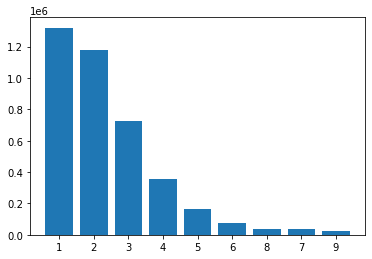

In [25]:
plt.bar(pf["BIRTHORDER"].value_counts().index, pf["BIRTHORDER"].value_counts().values)

Text(0.5, 0, 'Birth order')

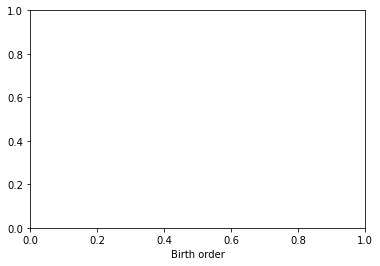

In [26]:
plt.xlabel("Birth order")

In [95]:
p = []
q = []
for i in n1988.index:
    p.append(n1988[0][i][60-1])
    q.append(n1988[0][i][(41-1):(42-1+1)])

pf = pd.DataFrame({"BIRTHORDER": p, "MATERNALAGE":q})

In [27]:
# Loop over the data, get columns 84-87 (month and date of birth)
# and put it in a dataframe.
p = []
q = []
for i in n1988.index:
    p.append(n1988[0][i][(84-1):(85-1+1)]) # MONTH
    q.append(n1988[0][i][(86-1):(87-1+1)]) # DAY
birthdate = pd.DataFrame({"MONTH": p, "DAY":q})

In [28]:
birthdate.MONTH.value_counts()

08    354599
09    347277
07    346831
10    331633
06    329222
05    326281
12    322327
03    322243
11    314666
01    310500
04    309463
02    298751
Name: MONTH, dtype: int64

In [29]:
months = birthdate.MONTH.value_counts().sort_values()
months

02    298751
04    309463
01    310500
11    314666
03    322243
12    322327
05    326281
06    329222
10    331633
07    346831
09    347277
08    354599
Name: MONTH, dtype: int64

In [30]:
months = birthdate.MONTH.value_counts().sort_values("index")
months

02    298751
04    309463
01    310500
11    314666
03    322243
12    322327
05    326281
06    329222
10    331633
07    346831
09    347277
08    354599
Name: MONTH, dtype: int64

In [31]:
months = birthdate.MONTH.value_counts().sort_index()
months

01    310500
02    298751
03    322243
04    309463
05    326281
06    329222
07    346831
08    354599
09    347277
10    331633
11    314666
12    322327
Name: MONTH, dtype: int64

<BarContainer object of 12 artists>

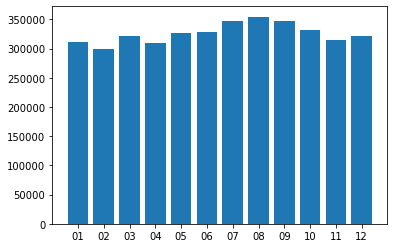

In [32]:
plt.bar(months.index, months.values)

In [33]:
days = birthdate.DAY.value_counts().sort_index()
days

01    129940
02    126943
03    123604
04    125798
05    126746
06    127817
07    129599
08    132952
09    127886
10    124794
11    128938
12    130094
13    125315
14    129524
15    132883
16    129031
17    125259
18    130035
19    130720
20    129787
21    129716
22    133094
23    127370
24    121460
25    127612
26    128610
27    127819
28    130629
29    131792
30    116662
31     71357
99         7
Name: DAY, dtype: int64

<BarContainer object of 32 artists>

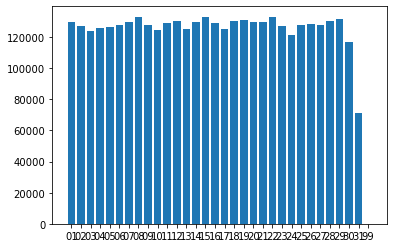

In [34]:
plt.bar(days.index, days)

<BarContainer object of 32 artists>

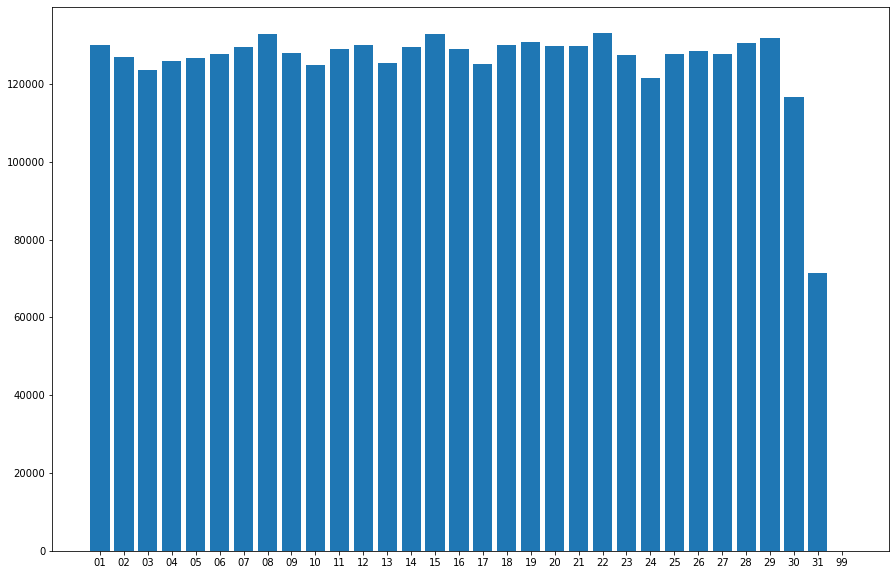

In [35]:
plt.figure(figsize=(15,10))
plt.bar(days.index, days)

In [36]:
pd.to_datetime("1988-01-01")

Timestamp('1988-01-01 00:00:00')

In [37]:
birthdate.head()

,MONTH,DAY
0,01,08
1,01,01
2,01,07
3,01,06
4,01,01


I'm pretty sure I'm going to need to change these into a time format to make good use of them.  Let us construct an ISO-8601-compliant string like 1988-01-02 and add it as a new column.

In [40]:
birthdate["ISO8601"] = pd.to_datetime("1988" + birthdate["MONTH"]+ birthdate["DAY"])

ParserError: day is out of range for month: 19881099

In [41]:
# ParserError: day is out of range for month: 19881099

# Believe it or not, this is good news.  October 99th is not being coded as a date.
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
# we have options errors="ignore" which will set the date to the input or
# errors="coerce" which will set the date to Not a Time.
birthdate["DATE"] = pd.to_datetime("1988" + birthdate["MONTH"]+ birthdate["DAY"], errors="coerce")

In [43]:
# It completes this time.  Look at the output 
birthdate.head()

,MONTH,DAY,DATE
0,01,08,1988-01-08
1,01,01,1988-01-01
2,01,07,1988-01-07
3,01,06,1988-01-06
4,01,01,1988-01-01


(<Figure size 900x244.8 with 3 Axes>,
 array([<AxesSubplot:ylabel='2019'>, <AxesSubplot:ylabel='2020'>],
       dtype=object))

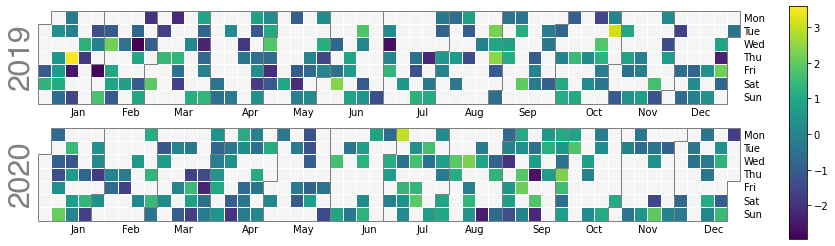

In [5]:
# This is the example code from a python module for making calendars:
# https://github.com/tomkwok/calplot
import calplot
import numpy as np; np.random.seed(sum(map(ord, 'calplot')))
import pandas as pd
all_days = pd.date_range('1/1/2019', periods=730, freq='D')
days = np.random.choice(all_days, 500)
events = pd.Series(np.random.randn(len(days)), index=days)
calplot.calplot(events)


1988-04-19   -1.578210
1988-08-13   -1.652141
1988-05-16   -0.697981
1988-07-10    0.807642
1988-04-10    0.332722
dtype: float64

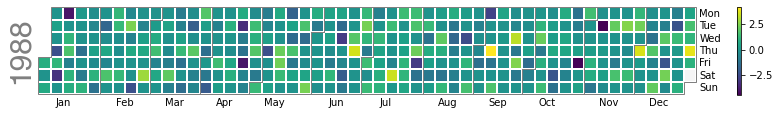

In [45]:
all_days = pd.date_range('1/1/1988', periods=365, freq='D')
days = np.random.choice(all_days, 500)
events = pd.Series(np.random.randn(len(days)), index=days)
calplot.calplot(events)
events.head()

In [47]:
datehist = birthdate["DATE"].value_counts()
datehist.head()

1988-09-20    12851
1988-07-07    12727
1988-09-23    12694
1988-09-09    12661
1988-09-16    12620
Name: DATE, dtype: int64

(<Figure size 900x122.4 with 2 Axes>,
 array([<AxesSubplot:ylabel='1988'>], dtype=object))

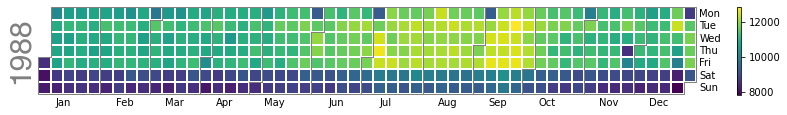

In [48]:
# This looks promising.  Let us try making a calendar plot.
calplot.calplot(datehist)


In [49]:
plt.bar(datehist)

TypeError: bar() missing 1 required positional argument: 'height'

<BarContainer object of 366 artists>

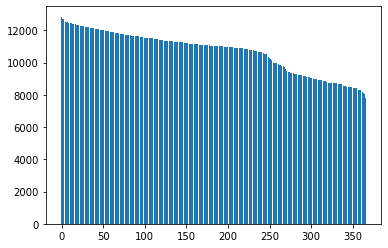

In [50]:
plt.bar(range(len(datehist)), datehist)

In [ ]:
#  Aaaargghh.  When I created the histogram, it sorted by value, which is bad.
#  Why do we have a bimodal distribution here?

<BarContainer object of 366 artists>

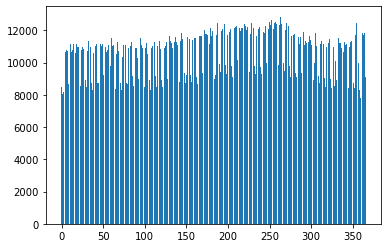

In [51]:
plt.bar(range(len(datehist)), datehist.sort_index())

Text(0.5, 0, 'Day in 1988')

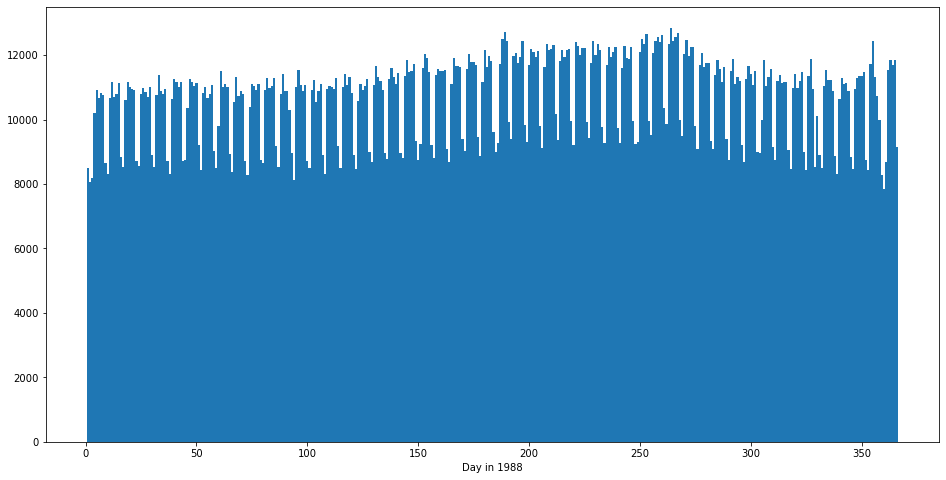

In [52]:
# Make this wider, more pleasant to look at
plt.figure(figsize=(16,8))
plt.bar(range(1,len(datehist)+1), datehist.sort_index(), width=1)
plt.xlabel ("Day in 1988")

In [ ]:
# This is not presentation-ready, but this gives us some pretty good insight into
# three drivers of birth timing, weekends, holidays, and a seasonal modulation.

In [ ]:
# Let us look back at our data parser, though.  
# It's slow, and I don't want to edit it every time
# a new column comes to my attention.

# Loop over the data, get columns 84-87 (month and date of birth)
# and put it in a dataframe.
p = []
q = []
for i in n1988.index:
    p.append(n1988[0][i][(84-1):(85-1+1)]) # MONTH
    q.append(n1988[0][i][(86-1):(87-1+1)]) # DAY
birthdate = pd.DataFrame({"MONTH": p, "DAY":q})

Looking at the description...

![Data description](FIELDS.jpg "Exceprt from data description showing Date and month fields")

To get the data into our computing environment, we have three tasks:
1. extract columns (with the right field width)
2. associate columns with human-readable names 
3. decode symbols 

If we can put the layout of the database *into data, instead of code*, we can expand the scope of our investigation by modifying data, *not code*.  This will work well for us.

In [155]:
# let's start with trying to use data to specify the layout,
# write a partser that generates a dataframe with column names,
# and we can expand to more columns (and decode the symbols) later.


~/git/VIZ/visualization-curriculum


In [60]:
# Let us start with something like these fields (which do not require decoding)
# This is a (pure python) list of lists
#  [ [startcolumn, stopcolumn, fieldname] ] 
dict1988 =[
    [84, 85, "MONTHOFBIRTH"],
    [86, 87, "DAYOFMONTH"],
]
# Since this is our data structure for our use, we can use any data type that works;
# there is no requirement that we use pandas or numpy here.


# Now, to organize my thoughts, I'm going to write a function prototype with a docstring that tells me what I need and what I promise to deliver.

In [ ]:
def parse_natality(natalitydata, datadictionary):
    '''Take in pandas dataframe natalitydata and list-of-lists 
    datadictionary  (for example [[43, 44, "MATERNALAGE"]] ) 
    and return a pandas dataframe (same number of rows) with 
    labeled columns  '''

In [ ]:
#  Where to start?  For loop over data dictionary first, or for loop over data?
#  Hint: which one is more expensive? This is the one we will want to do once.
# 

In [54]:
print(type(n1988[0]))
n1988[0]

<class 'pandas.core.series.Series'>


0          8010      110100299991771630100263211111231012...
1          8010      110100699990002630100663219223160304...
2          8010      110100699990002630100663212223241113...
3          8010      110100699990002630100663119223241113...
4          8010      110100699990002630100663219223261314...
                                 ...                        
3913788    8520      115101199990002835101183111111190607...
3913789    8520      115101199990002835101183119111200709...
3913790    8520      115101199990002835101183219111241113...
3913791    8520      115101599990002835101583111111291614...
3913792    8520      115102099990002835102083231111271414...
Name: 0, Length: 3913793, dtype: object

In [56]:
print(type(n1988[0].loc[42]))
n1988[0].loc[42]

<class 'str'>


'8010      110101699990002630101663111111220911083320000000110111111 23033390072111101050301744092141041309112011777777700000777707777770001160   111111001102110111111110211   100000830940000 330103101031000011709101'

In [57]:
print(type(n1988[0].loc[42][83:84+1]))
n1988[0].loc[42][83:84+1]

<class 'str'>


'01'

In [176]:
# So I can access the cth column and ith row with df[0].loc[i][c]

83    8010      110101799990931630101763211111241113...
84    8010      110101799990931630101763111111342115...
Name: 0, dtype: object

In [58]:
# First I'm going to make certain I have the data I think I do
def parse_natality(natalitydata, datadictionary):
    '''Take in pandas dataframe natalitydata and list-of-lists datadictionary
    (for example [[43, 44, "MATERNALAGE"]] ) and return a pandas dataframe (same 
    number of rows) with labeled columns  '''
    for index in natalitydata.index:
        for start, stop, column_name in datadictionary:
            if index < 3:
                print(index, start,stop, column_name)

In [61]:
parse_natality(n1988, dict1988)

0 84 85 MONTHOFBIRTH
0 86 87 DAYOFMONTH
1 84 85 MONTHOFBIRTH
1 86 87 DAYOFMONTH
2 84 85 MONTHOFBIRTH
2 86 87 DAYOFMONTH


In [62]:
# Above, we had hard-coded lists p and q that took all our intermediate data.  
# If we are going to automate column-extraction, we need a more flexible data structure.
# Dictionary of lists.
# So let's make a dictionary of empty lists first.
def parse_natality(natalitydata, datadictionary):
    '''Take in pandas dataframe natalitydata and list-of-lists datadictionary
    (for example [[43, 44, "MATERNALAGE"]] ) and return a pandas dataframe (same 
    number of rows) with labeled columns  '''
    intermediate_data={}
    # First, populate intermediate_data with empty lists for each column_name
    for start, stop, column_name in datadictionary:
        intermediate_data[column_name] = []
    # Now loop through the data    
    for index in natalitydata.index:
        for start, stop, column_name in datadictionary:
            if index < 3:
                print(index, start,stop, column_name)
    return intermediate_data

In [63]:
parse_natality(n1988, dict1988)

0 84 85 MONTHOFBIRTH
0 86 87 DAYOFMONTH
1 84 85 MONTHOFBIRTH
1 86 87 DAYOFMONTH
2 84 85 MONTHOFBIRTH
2 86 87 DAYOFMONTH


{'MONTHOFBIRTH': [], 'DAYOFMONTH': []}

In [66]:
def parse_natality(natalitydata, datadictionary):
    '''Take in pandas dataframe natalitydata and list-of-lists datadictionary
    (for example [[43, 44, "MATERNALAGE"]] ) and return a pandas dataframe (same 
    number of rows) with labeled columns  '''
    intermediate_data={}
    # First, populate intermediate_data with empty lists for each column_name
    for start, stop, column_name in datadictionary:
        intermediate_data[column_name] = []
    for idx in natalitydata.index:
        for start, stop, column_name in datadictionary:
            if idx < 3:
                datafield = natalitydata.loc[idx][0][start:(stop+1)]
                print(idx, start,stop, column_name, datafield)
    return intermediate_data

In [67]:
parse_natality(n1988, dict1988)

0 84 85 MONTHOFBIRTH 10
0 86 87 DAYOFMONTH 80
1 84 85 MONTHOFBIRTH 10
1 86 87 DAYOFMONTH 10
2 84 85 MONTHOFBIRTH 10
2 86 87 DAYOFMONTH 70


{'MONTHOFBIRTH': [], 'DAYOFMONTH': []}

In [69]:
# Well, that's not right.  Day of month 80?  Birth order 0?  Off-by-one again
def parse_natality(natalitydata, datadictionary):
    '''Take in pandas dataframe natalitydata and list-of-lists datadictionary
    (for example [[43, 44, "MATERNALAGE"]] ) and return a pandas dataframe (same 
    number of rows) with labeled columns  '''
    intermediate_data={}
    for start, stop, column_name in datadictionary:
        intermediate_data[column_name] = []
    for idx in natalitydata.index:
        for start, stop, column_name in datadictionary:
            if idx < 3:
                datafield = natalitydata.loc[idx][0][start-1:(stop-1+1)]
                print(idx, start,stop, column_name, datafield)
    return intermediate_data

In [70]:
parse_natality(n1988, dict1988)

0 84 85 MONTHOFBIRTH 01
0 86 87 DAYOFMONTH 08
1 84 85 MONTHOFBIRTH 01
1 86 87 DAYOFMONTH 01
2 84 85 MONTHOFBIRTH 01
2 86 87 DAYOFMONTH 07


{'MONTHOFBIRTH': [], 'DAYOFMONTH': []}

In [71]:
# These values look sane now, so let us put the data in lists.
def parse_natality(natalitydata, datadictionary):
    '''Take in pandas dataframe natalitydata and list-of-lists datadictionary
    (for example [[43, 44, "MATERNALAGE"]] ) and return a pandas dataframe (same 
    number of rows) with labeled columns  '''
    intermediate_data={}
    for start, stop, column_name in datadictionary:
        intermediate_data[column_name] = []
    for idx in natalitydata.index:
        for start, stop, column_name in datadictionary:
            datafield = natalitydata.loc[idx][0][start-1:(stop-1+1)]
            intermediate_data[column_name].append(datafield)
   #         if idx < 3:
   #              print(idx, start,stop, column_name, natalitydata.loc[idx][0][start-1:(stop-1+1)])
    return intermediate_data

In [ ]:
parse_natality(n1988, dict1988)

In [73]:
# Takes a while this time.  And it returns a hash of lists.  I'd prefer pandas data frames..
import time
starttime = time.time()
parse_natality(n1988, dict1988)
stoptime = time.time()
print(stoptime-starttime)   # Agh.   12 minutes 

744.03156208992


In [75]:
# My code doesn't even give me a dataframe yet and it's taking forever.  
# Faster feedback will take me to my goal faster.. so create a dataframe 
# that only has 1% of the data: 
n1988sample = n1988[::100]
len(n1988sample)

39138

In [74]:
# transfer data from intermediate_data hash to pandas dataframe at the end
def parse_natality(natalitydata, datadictionary):
    '''Take in pandas dataframe natalitydata and list-of-lists datadictionary
    (for example [[43, 44, "MATERNALAGE"]] ) and return a pandas dataframe (same 
    number of rows) with labeled columns  '''
    intermediate_data={}
    for start, stop, column_name in datadictionary:
        intermediate_data[column_name] = []
    for idx in natalitydata.index:
        for start, stop, column_name in datadictionary:
            intermediate_data[column_name].append(natalitydata.loc[idx][0][start-1:(stop-1+1)])
   #         if idx < 3:
   #              print(idx, start,stop, column_name, natalitydata.loc[idx][0][start-1:(stop-1+1)])
    df = pd.DataFrame()
    for start, stop, column_name in datadictionary:
        print(column_name)
        df[column_name] = pd.Series(intermediate_data[column_name])
    return df

In [76]:
starttime=time.time()
df = parse_natality(n1988sample, dict1988)
stoptime=time.time()
print(stoptime-starttime)

MONTHOFBIRTH
DAYOFMONTH
6.547459840774536


In [77]:
df

,MONTHOFBIRTH,DAYOFMONTH
0,01,08
1,01,07
2,01,04
3,01,02
4,01,03
...,...,...
39133,12,08
39134,12,06
39135,12,31
39136,11,01


In [247]:
#  This puts my data in a reasonably good place, but now I worry about efficiency.
#  This didn't take long, but it was 1% of the whole dataset.
#  I only have to run this when I want to get new columns, but still, I want to 
#  lower my personal cost of accessing information.

# Why am I looping through all 4M records?  Because I am accessing 
# the columns by .loc[i][colnumber].  Can pandas help me?
# https://pandas.pydata.org/pandas-docs/version/1.3/user_guide/text.html 

# pd.str.get() will extract a single column *as a pandas dataframe*,
# so I can get all the rows with a single operation. 

MONTHOFBIRTH
DAYOFMONTH
BIRTHODRDER
MATERNALAGE
1980.126319885254


In [82]:
n1988sample[0].str.get(80)

0          1
100        1
200        1
300        1
400        1
          ..
3913300    1
3913400    1
3913500    1
3913600    1
3913700    1
Name: 0, Length: 39138, dtype: object

In [87]:
def parse_natality(natalitydata, datadictionary):
    '''Take in pandas dataframe natalitydata and list-of-lists datadictionary
    (for example [[43, 44, "MATERNALAGE"]] ) and return a pandas dataframe (same 
    number of rows) with labeled columns  '''
    df = pd.DataFrame()
    for start, stop, column_name in datadictionary:
        df[column_name] = natalitydata[0].str.get(start-1)
    return df


In [88]:
starttime=time.time()
df = parse_natality(n1988sample, dict1988) 
stoptime=time.time()
print(stoptime-starttime)

0.160660982131958


In [89]:
df

,MONTHOFBIRTH,DAYOFMONTH
0,0,0
100,0,0
200,0,0
300,0,0
400,0,0
...,...,...
3913300,1,0
3913400,1,0
3913500,1,3
3913600,1,0


In [ ]:
# almost there, but pd.str.get()  only gets one column at a time.


In [90]:
def parse_natality(natalitydata, datadictionary):
    '''Take in pandas dataframe natalitydata and list-of-lists datadictionary
    (for example [[43, 44, "MATERNALAGE"]] ) and return a pandas dataframe (same 
    number of rows) with labeled columns  '''
    df = pd.DataFrame()
    for start, stop, column_name in datadictionary:
        # Get the first column (start)
        df[column_name] = natalitydata[0].str.get(start-1)
        # Get the remaining columns
        for i in range(1, stop-start + 1):
            df[column_name]=  df[column_name].str.cat(natalitydata[0].str.get(start-1+i))
    return df

In [91]:
starttime=time.time()
df = parse_natality(n1988sample, dict1988) 
stoptime=time.time()
print(stoptime-starttime)
df.head()

0.2548980712890625


,MONTHOFBIRTH,DAYOFMONTH
0,01,08
100,01,07
200,01,04
300,01,02
400,01,03


In [92]:
# Looks reasonable.  We can expand to the entire dataset and
# make sure it completes in a reaosonable time:
starttime=time.time()
df = parse_natality(n1988, dict1988) 
stoptime=time.time()
print(stoptime-starttime)
df.head()

13.163327932357788


,MONTHOFBIRTH,DAYOFMONTH
0,01,08
1,01,01
2,01,07
3,01,06
4,01,01


In [96]:
type(df.MONTHOFBIRTH)

pandas.core.series.Series

In [97]:
# That doesn't answer my question
type(df.MONTHOFBIRTH[0])
# One more picky little request.. numeric data types?


str

In [98]:
def parse_natality(natalitydata, datadictionary):
    '''Take in pandas dataframe natalitydata and list-of-lists datadictionary
    (for example [[43, 44, "MATERNALAGE"]] ) and return a pandas dataframe (same 
    number of rows) with labeled columns  '''
    df = pd.DataFrame()
    for start, stop, column_name in datadictionary:
        # Get the first column (start)
        df[column_name] = natalitydata[0].str.get(start-1)
        # Get the remaining columns
        for i in range(1, stop-start + 1):
            df[column_name]=  df[column_name].str.cat(natalitydata[0].str.get(start-1+i))
    return df
    for start, stop, column_name in datadictionary:
        pd[column_name] = pd.to_numeric(pd[column_name])

In [102]:
df = parse_natality(n1988, dict1988) 
type(df.MONTHOFBIRTH[0])
df.head()

str

In [104]:
# I am now satisfied that it is working.
dict1988 =[
    [84, 85, "MONTHOFBIRTH"],
    [86, 87, "DAYOFMONTH"],
    [60, 60, "BIRTHODRDER"],
    [41, 42, "MATERNALAGE"],
    [28, 29, "STATE"], 
    [69, 70, "PATERNALAGE"],
]

In [105]:
df = parse_natality(n1988, dict1988) 


In [106]:
age = df.MATERNALAGE.value_counts()

In [107]:
df.MATERNALAGE.value_counts().sort_index()

10        15
11        36
12       223
13      1804
14      8511
15     25611
16     55186
17     95932
18    133487
19    168485
20    185349
21    199385
22    212940
23    228896
24    241980
25    251485
26    255604
27    256243
28    245423
29    232004
30    212852
31    185984
32    160421
33    134290
34    110971
35     88625
36     68112
37     50907
38     36545
39     25657
40     17491
41     11305
42      5845
43      3121
44      1639
45       772
46       390
47       137
48        88
49        42
Name: MATERNALAGE, dtype: int64

{'01': 'AL',
 '02': 'AK',
 '03': 'AZ',
 '04': 'AR',
 '05': 'CA',
 '06': 'CO',
 '07': 'CT',
 '08': 'DE',
 '09': 'DC',
 '10': 'FL',
 '11': 'GA',
 '12': 'HI',
 '13': 'ID',
 '14': 'IL',
 '15': 'IN',
 '16': 'IA',
 '17': 'KS',
 '18': 'MD',
 '19': 'ME',
 '20': 'LA',
 '21': 'KY',
 '22': 'MA',
 '23': 'MI',
 '24': 'MN',
 '25': 'MS',
 '26': 'MO',
 '27': 'MT',
 '28': 'NE',
 '29': 'NV',
 '30': 'NH',
 '31': 'NJ',
 '32': 'NM',
 '33': 'NY',
 '34': 'NC',
 '35': 'ND',
 '36': 'OH',
 '37': 'OK',
 '38': 'OR',
 '39': 'PA',
 '40': 'RI',
 '41': 'SC',
 '42': 'SD',
 '43': 'TN',
 '44': 'TX',
 '45': 'UT',
 '46': 'VT',
 '47': 'VA',
 '48': 'WA',
 '49': 'WV',
 '50': 'WI',
 '51': 'WY'}

In [108]:
age = df.MATERNALAGE.value_counts()

In [109]:
df.MATERNALAGE.value_counts().sort_index()

10        15
11        36
12       223
13      1804
14      8511
15     25611
16     55186
17     95932
18    133487
19    168485
20    185349
21    199385
22    212940
23    228896
24    241980
25    251485
26    255604
27    256243
28    245423
29    232004
30    212852
31    185984
32    160421
33    134290
34    110971
35     88625
36     68112
37     50907
38     36545
39     25657
40     17491
41     11305
42      5845
43      3121
44      1639
45       772
46       390
47       137
48        88
49        42
Name: MATERNALAGE, dtype: int64

<BarContainer object of 40 artists>

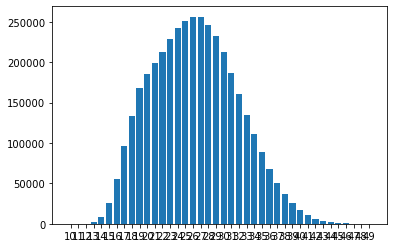

In [110]:
plt.bar(x=df.MATERNALAGE.value_counts().sort_index().index, height=df.MATERNALAGE.value_counts().sort_index().values)

<BarContainer object of 40 artists>

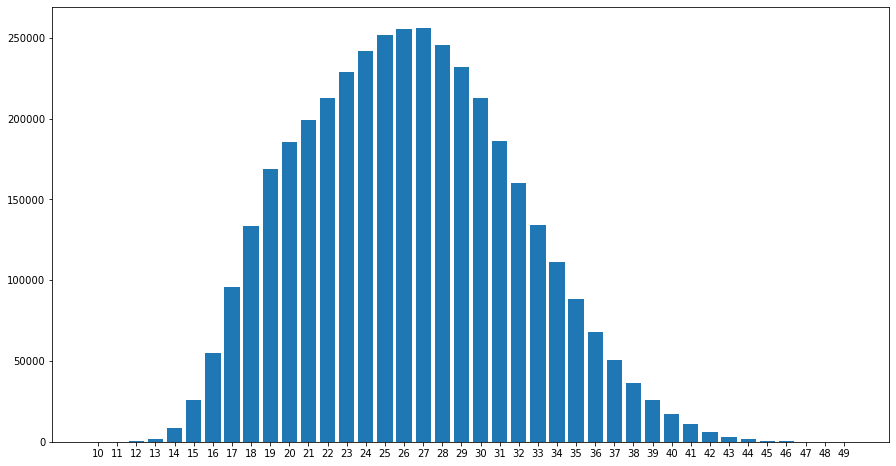

In [111]:
plt.figure(figsize=(15,8))
plt.bar(x=df.MATERNALAGE.value_counts().sort_index().index, height=df.MATERNALAGE.value_counts().sort_index().values)


(array([[3.30000e+02, 1.52000e+02, 1.80000e+01, 4.00000e+00, 1.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.57300e+03],
        [3.00350e+04, 5.94940e+04, 2.66400e+03, 3.02000e+02, 4.90000e+01,
         1.20000e+01, 3.00000e+00, 2.00000e+00, 0.00000e+00, 9.26790e+04],
        [2.37280e+04, 4.04708e+05, 4.97680e+04, 4.98400e+03, 7.33000e+02,
         1.60000e+02, 4.70000e+01, 1.10000e+01, 0.00000e+00, 2.02567e+05],
        [1.71000e+03, 5.29612e+05, 2.42126e+05, 2.18470e+04, 2.77900e+03,
         5.56000e+02, 1.00000e+02, 1.80000e+01, 3.00000e+00, 1.36550e+05],
        [3.33000e+02, 2.35694e+05, 6.07801e+05, 5.78670e+04, 6.03700e+03,
         9.74000e+02, 1.55000e+02, 1.90000e+01, 2.00000e+00, 8.03920e+04],
        [1.11000e+02, 4.21460e+04, 4.92953e+05, 1.03438e+05, 9.32400e+03,
         1.37100e+03, 1.97000e+02, 2.30000e+01, 6.00000e+00, 4.39780e+04],
        [4.00000e+01, 1.04440e+04, 1.55220e+05, 1.20602e+05, 1.05510e+04,
         1.51600e+03, 2.69000e+0

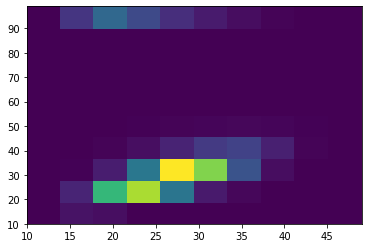

In [115]:
plt.hist2d(pd.to_numeric(df["MATERNALAGE"]), pd.to_numeric(df["PATERNALAGE"]))

(array([[0.00000e+00, 1.00000e+00, 1.00000e+00, 4.00000e+00, 5.00000e+00,
         0.00000e+00, 2.00000e+00, 3.00000e+00, 1.00000e+00, 2.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 3.20000e+01],
        [1.00000e+00, 1.50000e+01, 1.60000e+01, 1.10000e+01, 2.00000e+00,
         3.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.75000e+02],
        [0.00000e+00, 6.80000e+01, 2.28000e+02, 8.90000e+01, 3.00000e+01,
         8.00000e+00, 6.00000e+00, 3

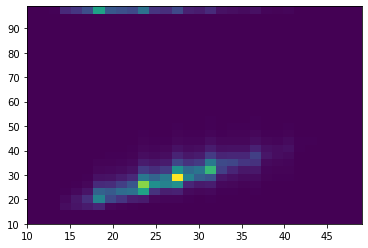

In [117]:
# More bins?
plt.hist2d(pd.to_numeric(df["MATERNALAGE"]), pd.to_numeric(df["PATERNALAGE"]), bins=30)

In [ ]:
And here we have an example of the hisogrammer's migrane.  
The field boundaries for both MATERNALAGE and PATERNALAGE
sometimes encompass different numbers of data points on the
underlying distribution over nonnegative integers.

We can always fix this by explicitly defining the bins to 
always include integer numbers of numbers.  

In [119]:
bins1 = np.arange(10,50) +.5
bins2 = np.arange(10,100)+.5

Text(0, 0.5, 'Paternal age')

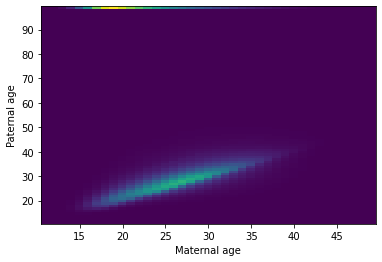

In [121]:
plt.hist2d(pd.to_numeric(df["MATERNALAGE"]), pd.to_numeric(df["PATERNALAGE"]), bins=(bins1, bins2))
plt.xlabel("Maternal age"); plt.ylabel("Paternal age")

In [ ]:
Now we see something peculiar; the catch-all category 
PATERNALAGE=99 is a symbol for missing values.  
And just glancing at the heatmap shows the marginal
distribution of MATERNALAGE given PATERNALAGE=99 is 
peaked around 18.

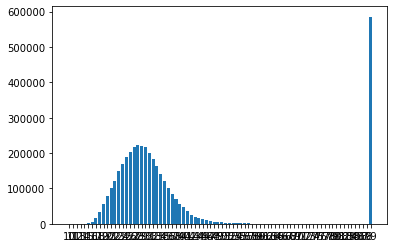

In [122]:
paternalage = df.PATERNALAGE.value_counts().sort_index()
plt.bar(paternalage.index, paternalage.values)
maternalage = df.MATERNALAGE.value_counts().sort_index()

<ipython-input-123-b4f57fe76ace>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(211)


<BarContainer object of 40 artists>

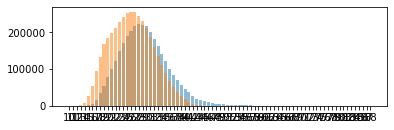

In [123]:
paternalage = df.PATERNALAGE.value_counts().sort_index()[:-1]

plt.subplot(211)
plt.bar(paternalage.index, paternalage.values, alpha=0.5)
plt.subplot(211)
plt.bar(maternalage.index, maternalage.values, alpha=0.5)



<BarContainer object of 40 artists>

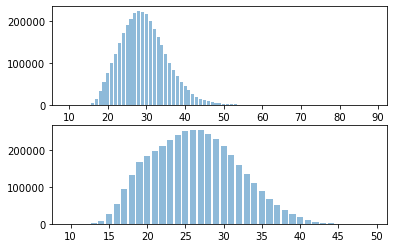

In [130]:

plt.subplot(211)
plt.bar(pd.to_numeric(paternalage.index), paternalage.values, alpha=0.5)
plt.subplot(212)
plt.bar(pd.to_numeric(maternalage.index), maternalage.values, alpha=0.5)


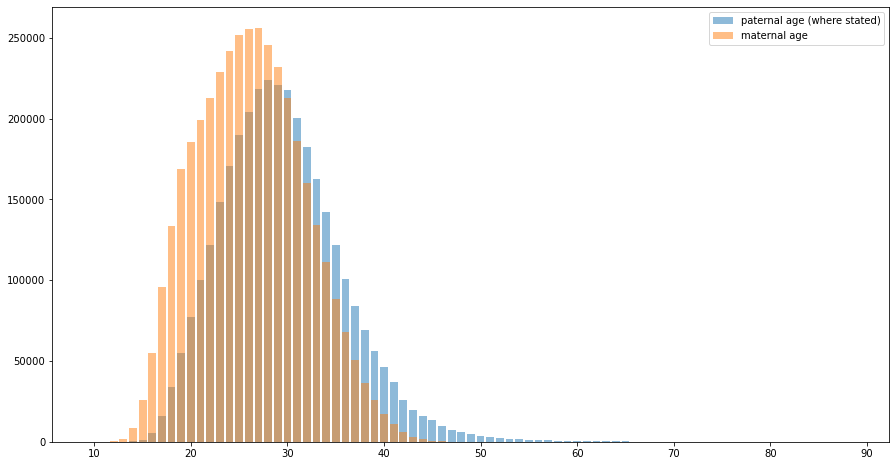

In [133]:
plt.figure(figsize=(15,8))
plt.bar(pd.to_numeric(paternalage.index), paternalage.values, alpha=0.5, label="paternal age (where stated)")
plt.bar(pd.to_numeric(maternalage.index), maternalage.values, alpha=0.5, label="maternal age")
plt.legend()

In [125]:
df["MATERNALAGE"]=pd.to_numeric(df.MATERNALAGE)

In [126]:
# Since I have a list of individual rows.. and I want something like a histogram.. I look
# into the pandas doucmentation for methods that aggregate dataframes:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html
#
gb = df.groupby(["MATERNALAGE", "STATE"])

In [127]:
gb.MATERNALAGE.median()

MATERNALAGE  STATE
10           05       10
             09       10
             10       10
             15       10
             18       10
                      ..
49           24       49
             33       49
             39       49
             44       49
             50       49
Name: MATERNALAGE, Length: 1854, dtype: int64

In [357]:
gb = df.groupby(["STATE", "MATERNALAGE"])

In [128]:
gb.MATERNALAGE.count()

MATERNALAGE  STATE
10           05       1
             09       1
             10       2
             15       3
             18       1
                     ..
49           24       1
             33       1
             39       1
             44       2
             50       2
Name: MATERNALAGE, Length: 1854, dtype: int64

In [375]:
gb.STATE.count()

STATE  MATERNALAGE
01     12                8
       13               61
       14              221
       15              613
       16             1319
                      ... 
51     43                4
       44                4
       45                2
       46                2
       47                1
Name: STATE, Length: 1854, dtype: int64

In [129]:
df.groupby("STATE")["MATERNALAGE"].median()

STATE
01    25
02    26
03    26
04    24
05    27
06    27
07    28
08    26
09    28
10    26
11    25
12    27
13    26
14    26
15    25
16    26
17    26
18    25
19    25
20    26
21    26
22    28
23    26
24    27
25    24
26    26
27    26
28    26
29    26
30    27
31    28
32    25
33    27
34    25
35    26
36    26
37    25
38    26
39    27
40    27
41    25
42    26
43    25
44    25
45    26
46    27
47    26
48    26
49    24
50    27
51    26
Name: MATERNALAGE, dtype: int64

In [ ]:
#If only we could decode the states, we would see which states have on average older mothers.

* Fail early and often
* Invest in faster feedback
** Hack at code with data subset
* Specify what you want before you do it
* Get it right first, make it fast later
* Usually better to use p

In [ ]:
# Cleaning up the numbers which are symbols is a little messier.  It is left as an exercise for the student.



In [116]:
h = {}
for line in open("~/Downloads/birth/STATE2829decoder.csv"):
    fields = line.strip().split()
    h[fields[0]] = fields[1]
h

{'01': 'AL',
 '02': 'AK',
 '03': 'AZ',
 '04': 'AR',
 '05': 'CA',
 '06': 'CO',
 '07': 'CT',
 '08': 'DE',
 '09': 'DC',
 '10': 'FL',
 '11': 'GA',
 '12': 'HI',
 '13': 'ID',
 '14': 'IL',
 '15': 'IN',
 '16': 'IA',
 '17': 'KS',
 '18': 'MD',
 '19': 'ME',
 '20': 'LA',
 '21': 'KY',
 '22': 'MA',
 '23': 'MI',
 '24': 'MN',
 '25': 'MS',
 '26': 'MO',
 '27': 'MT',
 '28': 'NE',
 '29': 'NV',
 '30': 'NH',
 '31': 'NJ',
 '32': 'NM',
 '33': 'NY',
 '34': 'NC',
 '35': 'ND',
 '36': 'OH',
 '37': 'OK',
 '38': 'OR',
 '39': 'PA',
 '40': 'RI',
 '41': 'SC',
 '42': 'SD',
 '43': 'TN',
 '44': 'TX',
 '45': 'UT',
 '46': 'VT',
 '47': 'VA',
 '48': 'WA',
 '49': 'WV',
 '50': 'WI',
 '51': 'WY'}

In [ ]:
df["STATEA"] = pd.Series ( "", index=df.index)
for i in df.index:
    df["STATEA"].loc[i] =  h [ df.loc[i].STATE] 
    if i % 100 == 0:
        print(i,  h [ df.loc[i].STATE] )